In this lab we will use Baseline Recurrent Neural Network (RNN) model for mnist dataset with plotting functionality for the model and retrain the model with learning rate scheduler which is a component of parameterized learning.

Four components of parameterized learning.

1. Data (Xi and yi): Raw pixlel intensities / extracted features + class labels y=(k=0,1,2 ...9). Each data is D-dimensional. (N=60000 total images, Each image is 28x28 single channel image forming 784 vectors). 

2. Scoring function: output_class_labels = F(Input_images)  

3. Loss function: Measures agreement between predicted class labels and ground-truth class labels.

4. Weights and biases - It will be updated during training process.

# Data

For example, consider
a dataset of 100 images from the MNIST dataset, each image sized 28 × 28 pixels. The design matrix for this dataset would be X ⊆ R100×(28x28) where Xi defines the i-th image in R. Using this notation, X1 is the first image, X2 the second image, and so on.

We also define a vector y in supervised learning where yi provides the class label for the i-th example in the dataset.

#Scoring Function                                                       

The scoring function accepts our data as an input and maps the data to class labels. For instance,
given our set of input images, the scoring function takes these data points, applies some function
f (our scoring function), and then returns the predicted class labels, similar to the pseudocode
below: output_class_labels = F(Input_images).

#Loss Function:                                                     
A loss function quantifies how well our predicted class labels agree with our ground-truth labels.
The higher level of agreement between these two sets of labels, the lower our loss (and higher our
classification accuracy, at least on the training set)

#Weights and biases:             
Depending on your model type (MLP, CNN, RNN) there may exist many parameters, but at the most basic level, these are the four building blocks of parameterized learning that you’ll commonly encounter.
Once we’ve defined these four key components, we can then apply optimization methods that allow
us to find a set of parameters W and b that minimize our loss function with respect to our scoring
function (while increasing classification accuracy on our data).

In [18]:
!pip install tensorflow
!pip install scikit_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


A computational graph is a way to formalize the structure of a set of computations, such as those involved in mapping inputs and parameters to outputs and loss.

In [19]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [21]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.python.keras.utils import to_categorical, plot_model
from tensorflow.python.keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
# enable this if pydot can be installed
# pip install pydot
# We can also create a plot of the model for reference and save on the google drive for future reference.

#This requires that pydot and pygraphviz are installed in the local computer. 
#If this is a problem, you can comment out this line and the import statement for the plot_model() function

plot_model(model, to_file='/content/gdrive/MyDrive/Colab Notebooks/rnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [27]:
# For classification problem, we use categorical_crossentropy(multi class) / binary_crossentropy (two class)
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))

### RMSProp test acc is 97.4 ###


Epoch 1/20
60000/60000 [==============================] - 34s 559us/sample - loss: 0.1177 - acc: 0.9665
Epoch 2/20
60000/60000 [==============================] - 31s 516us/sample - loss: 0.1137 - acc: 0.9658
Epoch 3/20
60000/60000 [==============================] - 33s 551us/sample - loss: 0.1145 - acc: 0.9664
Epoch 4/20
60000/60000 [==============================] - 31s 517us/sample - loss: 0.1082 - acc: 0.9677
Epoch 5/20
60000/60000 [==============================] - 31s 509us/sample - loss: 0.1083 - acc: 0.9672
Epoch 6/20
60000/60000 [==============================] - 36s 594us/sample - loss: 0.1079 - acc: 0.9679
Epoch 7/20
60000/60000 [==============================] - 31s 514us/sample - loss: 0.1103 - acc: 0.9678
Epoch 8/20
60000/60000 [==============================] - 33s 553us/sample - loss: 0.1038 - acc: 0.9701
Epoch 9/20
60000/60000 [==============================] - 31s 510us/sample - loss: 0.1062 - acc: 0.9680
Epoch 10/20
60000/60000 [==============================] - 32s 5

Learning Rate Schedulers

The concept of learning rate schedules, sometimes called learning
rate annealing or adaptive learning rates. By adjusting our learning rate on an epoch-to-epoch basis,
we can reduce loss, increase accuracy, and even in certain situations reduce the total amount of time
it takes to train a network.

Learning rates were kept constant in few previous experiments covered in the lab – we typically
set alpha = {0.1, 0.01, 0.001} and then train the network for a fixed number of epochs without changing
the learning rate. This method may work well in some situations, but it’s often beneficial to
decrease our learning rate over time and perform abalation experiments for your inference.

# Task 1:

Perform validation split from the training data = 0.8 and validation data = 0.2 and then train the model with Adam optimizer with constant learning rates where lr=0.0001 and 0.01 and infer the test accuracy, validation accuracy and report it.

# Task 2:

Perform the above experiment with RNN with constant learning rate of 0.1 and 0.01 with SGD optimizer and report the test accuracy

MNIST - Hand written digit dataset, a hello world to the strategic learning experiments.    
where (“NIST” stands for National Institute of Standards and Technology while the “M” stands for “modified” as the data has been preprocessed to reduce any burden on computer vision processing and focus solely on the task of digit recognition) dataset is one of the most well studied datasets in the computer vision and machine learning literature. The goal of this dataset is to correctly classify the handwritten digits 0 − 9. Digits images are preprocessed and saved as grayscale images of dimension 28x28 resulting in a feature vector dimensionality of 784. In many cases, this dataset is a benchmark, a standard to which machine learning algorithms are ranked.

In [ ]:
####### Add your scripts for the constant learning rate ###########

0.00025
468.75
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[0.01, 0.00895054822107854, 0.00810044552450385, 0.007397817643795081, 0.006807351940095303, 0.006304176516942474, 0.0058702670971529205, 0.005492242207881368, 0.0051599587203302365, 0.004865588127964968, 0.004602991944764096, 0.00436728900534993, 0.004154549231408392, 0.003961572744379518, 0.003785727806170737, 0.0036248300860897142, 0.003477051460361613, 0.0033408502463877056, 0.003214917215881691, 0.0030981333746417784]
[0.01, 0.004602991944764096, 0.002989536621823617, 0.002213613724405091, 0.0017574692442882249, 0.0014571948998178504, 0.0012445550715619166, 0.0010860711376595165, 0.0009633911368015413, 0.0008656135035706557, 0.0007858546168958742, 0.0007195538765965101, 0.0006635700066357001, 0.0006156687702016315, 0.0005742176284811943, 0.0005379959650302623, 0.0005060728744939271, 0.0004777260241251642, 0.00045238633793259444, 0.000429599398560842]


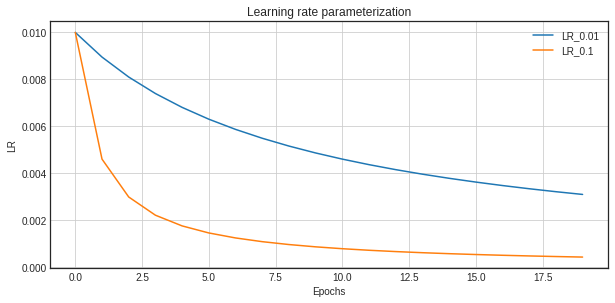

In [26]:
#Standard decay in keras package
#While using SGD optimizer the decay parameter is associated with the optimizers.

# Lr (learning rate) = 0.01
# Decay = lr/decay_E

decay_E = 40
Decay = 0.01/40
print(Decay)
batch_size = 128
print(60000/128)

# a time-based learning rate scheduler – it is controlled via the decay
# parameter of the optimizer classes (such as SGD)

#Therefore, a total of 469 weight updates need to be applied before an epoch completes
init_lr = 0.01
E=np.arange(0,20)
print(E)
iterations = 469
LR = []
for epoch in E:
  lr = init_lr*(1.0/(1.0+Decay*epoch*iterations))
  LR.append(lr)
print(LR)

LR_H =[]
Decay = 0.1 / 40

for epoch in E:
  lr = init_lr*(1.0/(1.0+Decay*epoch*iterations))
  LR_H.append(lr)
print(LR_H)

import matplotlib.pyplot as plt

plt.style.use("seaborn-white")
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.subplot(2, 1, 1)
plt.plot(np.arange(0, 20), LR, label="LR_0.01")
plt.plot(np.arange(0, 20), LR_H, label="LR_0.1")
plt.title('Learning rate parameterization')
plt.xlabel('Epochs')
plt.ylabel('LR')
plt.legend()
plt.grid(True)
plt.show()

  

In [29]:
import numpy as np
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.python.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.utils import to_categorical, plot_model
from tensorflow.python.keras.datasets import mnist

def step_decay(epoch):
    initial_alpha = 0.2
    factor = 0.25
    decayE = 5

    #
    alpha = initial_alpha*(factor**np.ceil((1+epoch)/decayE))
    print(epoch, alpha)
    return np.float(alpha)

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()


# loss function for one-hot vector
# use of sgd optimizer with step decay with learning rate scheduler that calculates lr and decreases it for every 5 epochs
# accuracy is good metric for classification tasks

callbacks = [LearningRateScheduler(step_decay)]

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
# train the network
H=model.fit(x_train, y_train, epochs=20, batch_size=batch_size, callbacks=callbacks)

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_6 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
0 0.05
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


60000/60000 [==============================] - 33s 542us/sample - loss: 0.5444 - acc: 0.8321
1 0.05
Epoch 2/20
60000/60000 [==============================] - 33s 551us/sample - loss: 0.2387 - acc: 0.9273
2 0.05
Epoch 3/20
60000/60000 [==============================] - 31s 516us/sample - loss: 0.1835 - acc: 0.9445
3 0.05
Epoch 4/20
60000/60000 [==============================] - 30s 502us/sample - loss: 0.1551 - acc: 0.9530
4 0.05
Epoch 5/20
60000/60000 [==============================] - 30s 504us/sample - loss: 0.1378 - acc: 0.9589
5 0.0125
Epoch 6/20
60000/60000 [==============================] - 31s 510us/sample - loss: 0.0921 - acc: 0.9722
6 0.0125
Epoch 7/20
60000/60000 [==============================] - 33s 544us/sample - loss: 0.0858 - acc: 0.9744
7 0.0125
Epoch 8/20
60000/60000 [==============================] - 30s 506us/sample - loss: 0.0814 - acc: 0.9751
8 0.0125
Epoch 9/20
60000/60000 [==============================] - 30s 508us/sample - loss: 0.0781 - acc: 0.9763
9 0.0125
Ep

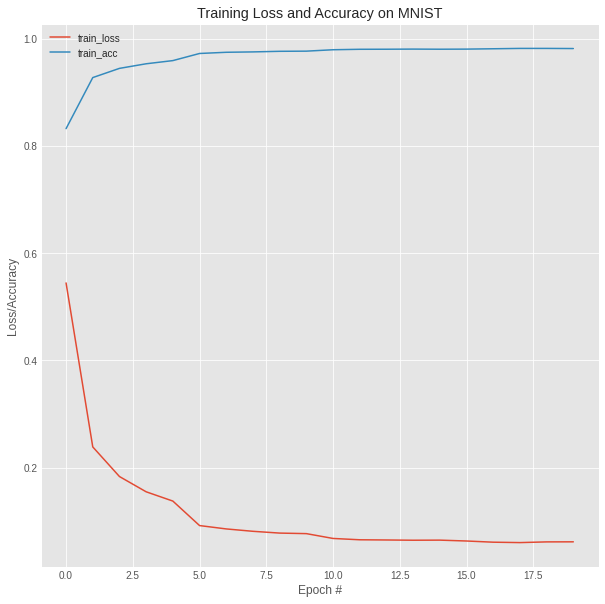

In [31]:
import matplotlib.pyplot as plt
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")

plt.title("Training Loss and Accuracy on MNIST")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#Task 3:
Perform the Learning rate scheduler experiment with validation data split = 0.2 and report the test and validation data accuracy.